### Author: Abhishek Shekhar
### Worked with: Fatumata, Thanh


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### 1- Download the file from the website and then read the data into DataFrame called DF.

In [14]:
df = pd.read_excel ('/Users/shekhara/Downloads/DryBeanDataset 4/Dry_Bean_Dataset.xlsx')
#df.head()
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


####   2- Choose the target attribute.

In [15]:
#Set Class as the target value 
Y = df['Class']
X = df.drop('Class', axis = 1)

In [ ]:
#visualization of data
plt.hist(df["Class"], bins = 7, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

#### 3- Divide the data into two subsets: training set (70% of the records from each class) and testing set (30% of the records from each class and different from the training data).

In [30]:
#Since the distribution of the groups is uneven we will be using a stratified split insted of random split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  

#### 4- Using training set, build the decision tree based on gini index or Entropy measrue. What is the training error?

In [31]:
#criterion based on gini
clf1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=None)

In [32]:
#training with gini
clf1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
# Predicton on test 
Y_test_pred1 = clf1.predict(X_test)

In [34]:
#confusion matrix
cm1 = confusion_matrix(Y_test_pred1, Y_test)

In [35]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [36]:
#accuracy 
accuracy(cm1)

0.8868756121449559

#### Testing error

In [37]:
# testing error
1-accuracy(cm1)

0.11312438785504408

In [38]:
Y_train_pred1 = clf1.predict(X_train)

In [39]:
cm_train1 = confusion_matrix(Y_train_pred1, Y_train)

In [40]:
accuracy(cm_train1)

1.0

####  Training Error

In [41]:
#training error
1-accuracy(cm_train1)

0.0

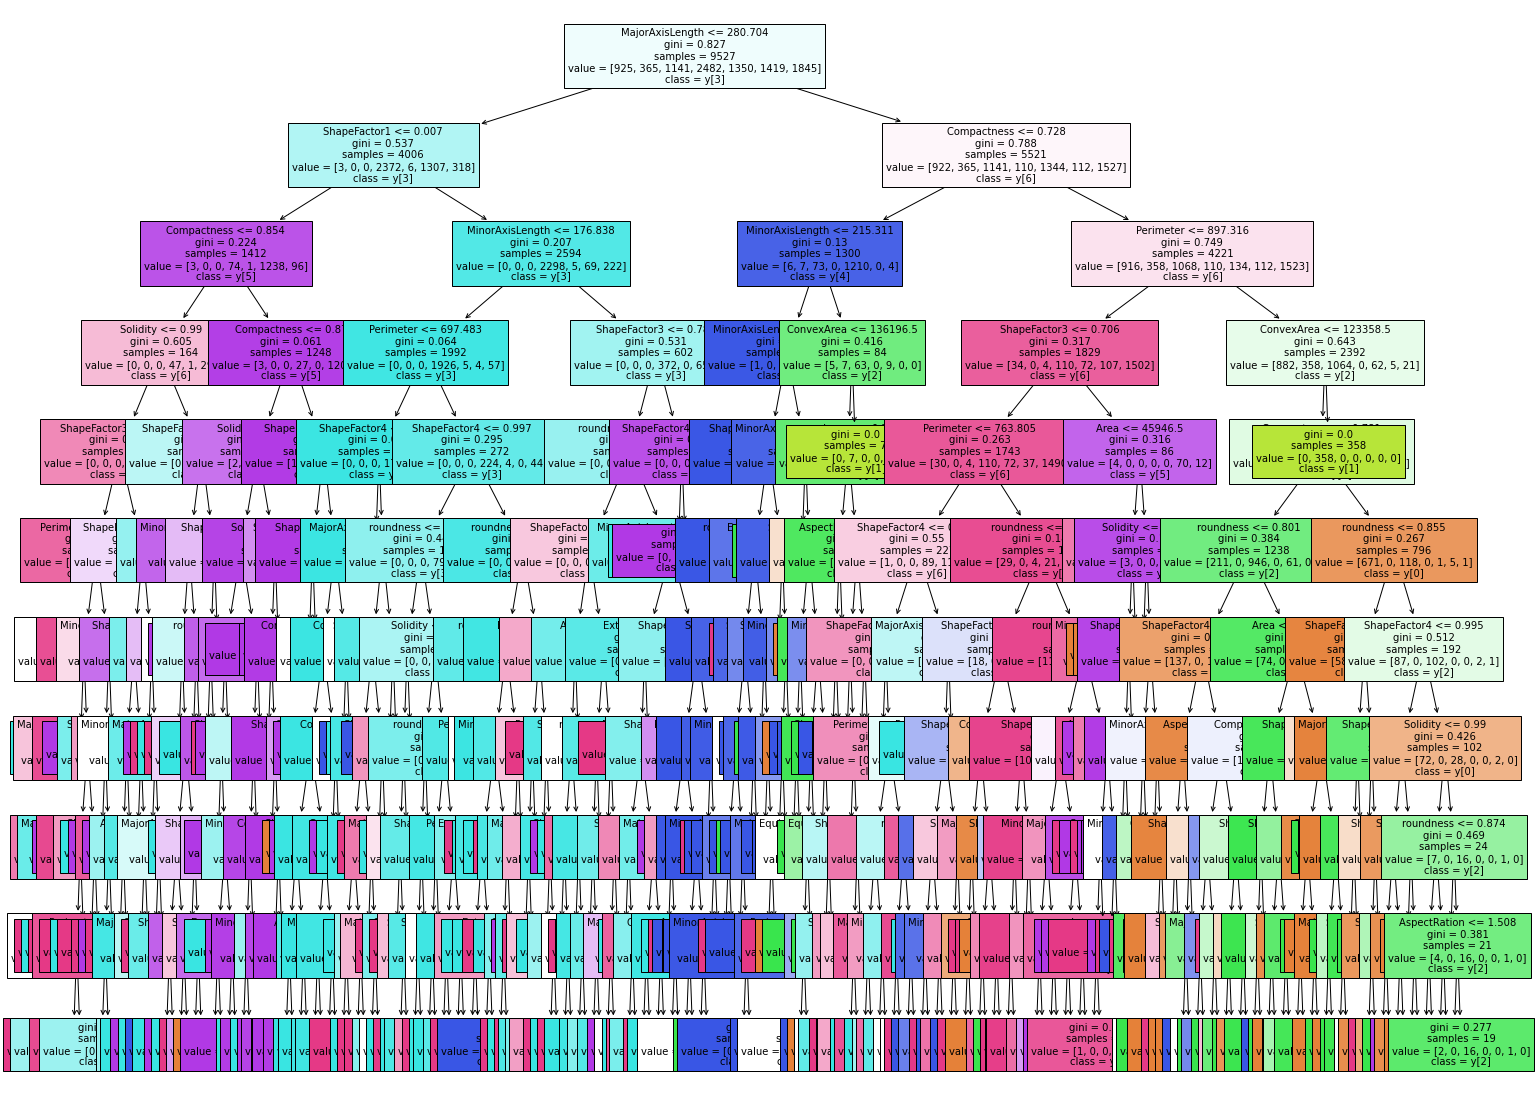

In [29]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf1, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()

#### Discuss the underfitting and overfitting by modifying the number of the nodes in the tree. Compare between the training error and testing error.

## The model is overfitted as the testing error is 11.3% and the training error is 0%. The model is too closely aligned to the training data which leads to more testing error. This is because the model is too specific.

# Model 2(Using entropy)

In [53]:
#based on entropy with max depth of 4
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [54]:
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
Y_test_pred2 = clf2.predict(X_test)

In [56]:
cm2 = confusion_matrix(Y_test_pred2, Y_test)

In [57]:
accuracy(cm2)

0.8616552399608227

In [58]:
#testing error
1-accuracy(cm2)

0.13834476003917728

In [59]:
Y_train_pred2 = clf2.predict(X_train)

In [60]:
cm_train2 = confusion_matrix(Y_train_pred2, Y_train)

In [61]:
accuracy(cm_train2)

0.8707882859242154

In [62]:
#training error
1-accuracy(cm_train2)

0.12921171407578458

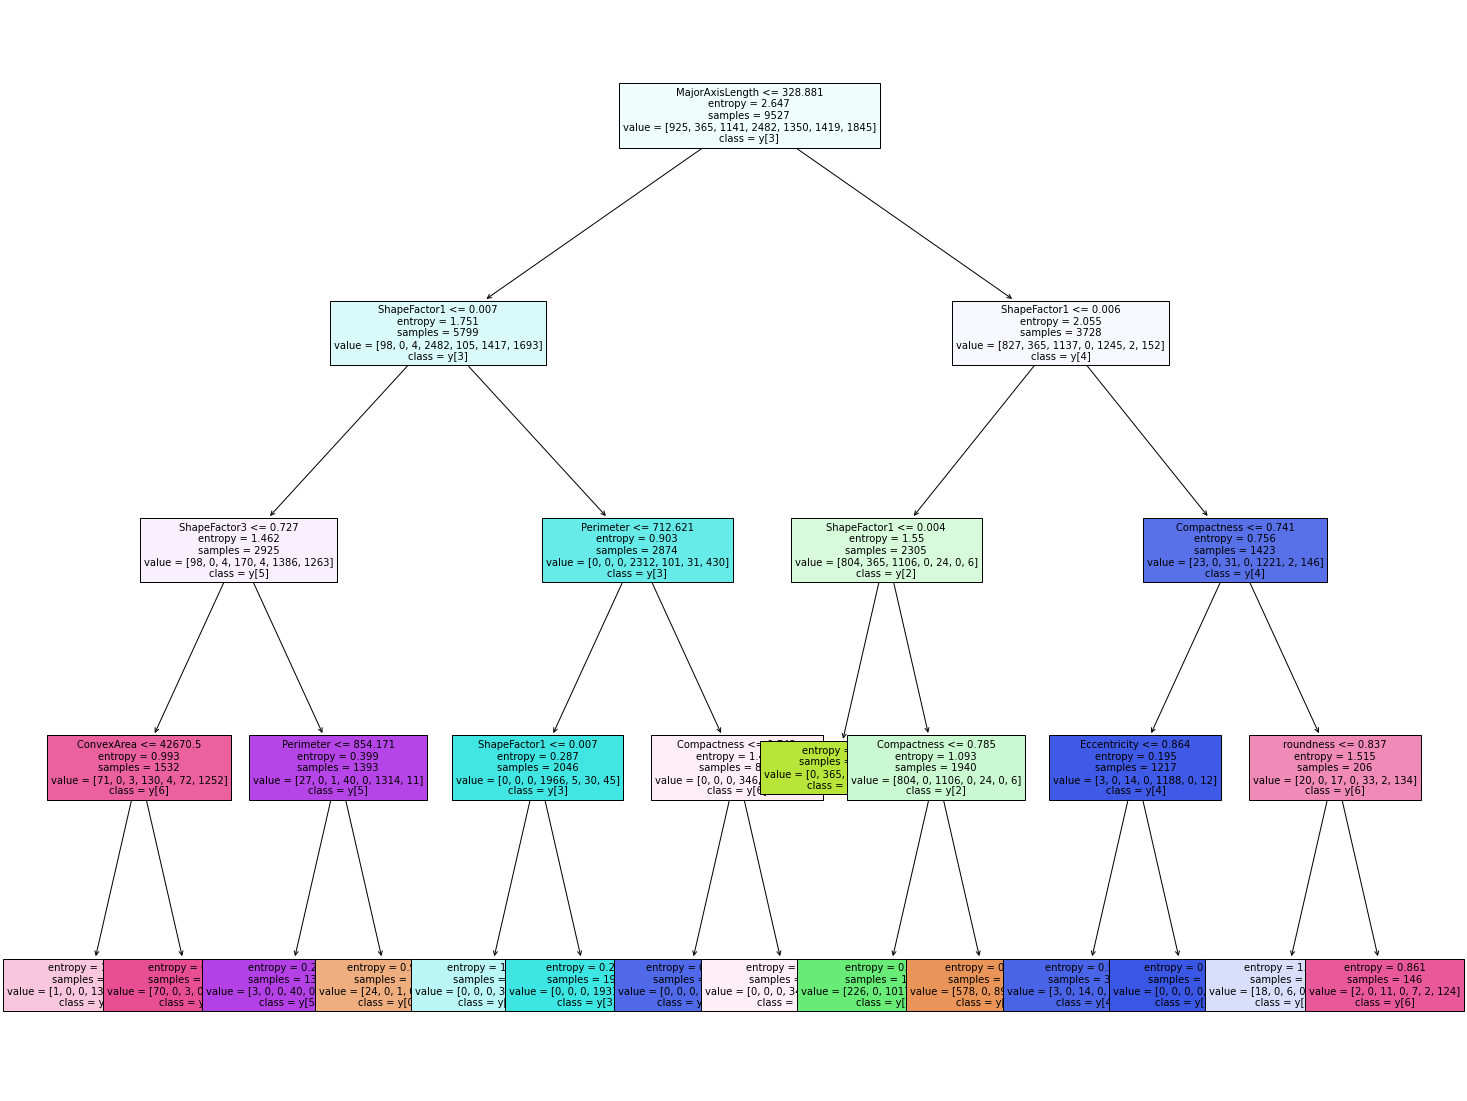

In [63]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf2, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()

## The model is underfitted as both the testing error and training error is 19.9% and 19.07% respectively. The model is too broad and uses too few attributes for prediction. We can predict very well, so I think increasing the number would benefit the predictibility of model
